In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = sns.load_dataset("mpg")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [13]:
df[df.isna().any(axis=1)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,usa,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,usa,amc concord dl


In [14]:
df = df.dropna()
df[df.isna().any(axis=1)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name


# Matrix form of statistical quantities

In [15]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [18]:
y = df.iloc[:,0].values.reshape(-1,1)

In [23]:
n = y.shape[0]
n

392

In [25]:
v1s = np.ones(n)

In [29]:
1./v1s.transpose().dot(v1s)

0.002551020408163265

v1s.transpose().dot(v1s).reshape(-1,1)

Construct $ \left (1_p^T 1_p \right)^{-1} $

np.linalg.inv(v1s.transpose().dot(v1s).reshape(-1,1))

evaluate  $ \left (1_p^T 1_p \right)^{-1} 1_p^T $

In [32]:
np.linalg.inv(v1s.transpose().dot(v1s).reshape(-1,1)) 

array([[0.00255102]])

In [33]:
v1s.transpose().dot(y)

array([9190.8])

In [37]:
np.dot(v1s.transpose(),y)

array([9190.8])

In [39]:
np.linalg.inv(v1s.transpose().dot(v1s).reshape(-1,1))*np.dot(v1s.transpose(),y)

array([[23.44591837]])

In [40]:
np.linalg.inv(v1s.transpose().dot(v1s).reshape(-1,1)).dot(np.dot(v1s.transpose(),y))

array([23.44591837])

In [41]:
def myMean():
    '''Write a function that finds the average using matrix representations'''

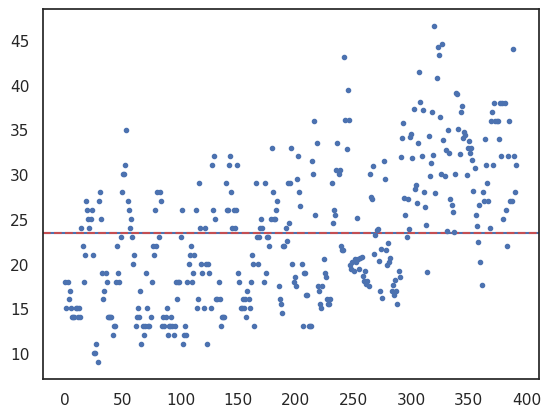

In [126]:
plt.axhline(np.linalg.inv(v1s.transpose().dot(v1s).reshape(-1,1)).dot(np.dot(v1s.transpose(),y)))
plt.axhline(y.mean(), color='r', linestyle='--')
plt.plot(y,'.')

In [43]:
y.mean()

23.445918367346938

### Center vector y and compare with `y -y.mean()`

In [49]:
np.identity(n).shape

(392, 392)

In [107]:
id = np.identity(n)


In [109]:
C = (id - v1s*np.linalg.inv(v1s.transpose().dot(v1s).reshape(-1,1))*v1s.T)
C.shape

(392, 392)

In [110]:
C

array([[ 0.99744898, -0.00255102, -0.00255102, ..., -0.00255102,
        -0.00255102, -0.00255102],
       [-0.00255102,  0.99744898, -0.00255102, ..., -0.00255102,
        -0.00255102, -0.00255102],
       [-0.00255102, -0.00255102,  0.99744898, ..., -0.00255102,
        -0.00255102, -0.00255102],
       ...,
       [-0.00255102, -0.00255102, -0.00255102, ...,  0.99744898,
        -0.00255102, -0.00255102],
       [-0.00255102, -0.00255102, -0.00255102, ..., -0.00255102,
         0.99744898, -0.00255102],
       [-0.00255102, -0.00255102, -0.00255102, ..., -0.00255102,
        -0.00255102,  0.99744898]])

In [112]:
sns.set_theme(style="white")

In [113]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)

<AxesSubplot:>

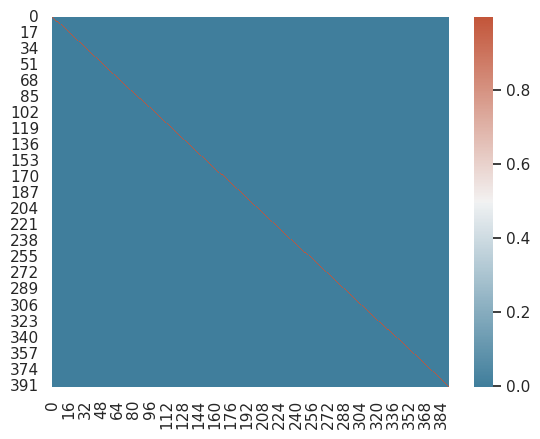

In [114]:
sns.heatmap(C, cmap=cmap)

In [115]:
C.dot(y)

array([[ -5.44591837],
       [ -8.44591837],
       [ -5.44591837],
       [ -7.44591837],
       [ -6.44591837],
       [ -8.44591837],
       [ -9.44591837],
       [ -9.44591837],
       [ -9.44591837],
       [ -8.44591837],
       [ -8.44591837],
       [ -9.44591837],
       [ -8.44591837],
       [ -9.44591837],
       [  0.55408163],
       [ -1.44591837],
       [ -5.44591837],
       [ -2.44591837],
       [  3.55408163],
       [  2.55408163],
       [  1.55408163],
       [  0.55408163],
       [  1.55408163],
       [  2.55408163],
       [ -2.44591837],
       [-13.44591837],
       [-13.44591837],
       [-12.44591837],
       [-14.44591837],
       [  3.55408163],
       [  4.55408163],
       [  1.55408163],
       [ -4.44591837],
       [ -7.44591837],
       [ -6.44591837],
       [ -4.44591837],
       [ -5.44591837],
       [ -9.44591837],
       [ -9.44591837],
       [ -9.44591837],
       [ -9.44591837],
       [-11.44591837],
       [-10.44591837],
       [-10

In [116]:
y-y.mean()

array([[ -5.44591837],
       [ -8.44591837],
       [ -5.44591837],
       [ -7.44591837],
       [ -6.44591837],
       [ -8.44591837],
       [ -9.44591837],
       [ -9.44591837],
       [ -9.44591837],
       [ -8.44591837],
       [ -8.44591837],
       [ -9.44591837],
       [ -8.44591837],
       [ -9.44591837],
       [  0.55408163],
       [ -1.44591837],
       [ -5.44591837],
       [ -2.44591837],
       [  3.55408163],
       [  2.55408163],
       [  1.55408163],
       [  0.55408163],
       [  1.55408163],
       [  2.55408163],
       [ -2.44591837],
       [-13.44591837],
       [-13.44591837],
       [-12.44591837],
       [-14.44591837],
       [  3.55408163],
       [  4.55408163],
       [  1.55408163],
       [ -4.44591837],
       [ -7.44591837],
       [ -6.44591837],
       [ -4.44591837],
       [ -5.44591837],
       [ -9.44591837],
       [ -9.44591837],
       [ -9.44591837],
       [ -9.44591837],
       [-11.44591837],
       [-10.44591837],
       [-10

In [117]:
centering_1 = C.dot(y)
centering_2 = y - y.mean()

In [118]:
centering_1 - centering_2

array([[-7.99360578e-15],
       [ 7.10542736e-15],
       [ 8.88178420e-15],
       [ 1.77635684e-15],
       [ 2.66453526e-15],
       [ 7.10542736e-15],
       [ 8.88178420e-15],
       [ 3.55271368e-15],
       [ 7.10542736e-15],
       [ 7.10542736e-15],
       [ 8.88178420e-15],
       [ 1.77635684e-15],
       [ 3.55271368e-15],
       [ 7.10542736e-15],
       [ 8.88178420e-15],
       [-5.32907052e-15],
       [-4.44089210e-15],
       [-3.55271368e-15],
       [ 5.32907052e-15],
       [-8.88178420e-15],
       [ 0.00000000e+00],
       [-3.55271368e-15],
       [ 5.32907052e-15],
       [-8.88178420e-15],
       [ 0.00000000e+00],
       [ 3.55271368e-15],
       [ 1.77635684e-15],
       [ 3.55271368e-15],
       [ 1.77635684e-15],
       [-3.55271368e-15],
       [ 5.32907052e-15],
       [-8.88178420e-15],
       [-7.99360578e-15],
       [ 7.99360578e-15],
       [ 8.88178420e-15],
       [-8.88178420e-15],
       [-4.44089210e-15],
       [ 7.10542736e-15],
       [ 7.1

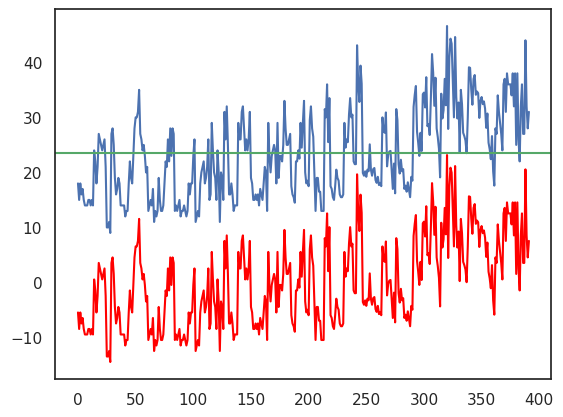

In [132]:
plt.plot(y)
plt.axhline(y.mean(),color='g')
plt.plot(centering_1, c='red')
#lt.plot(centering_2,'s',c='red')

In [133]:
np.linalg.inv(v1s.transpose().dot(v1s).reshape(-1,1)).dot(np.dot(v1s.transpose(),centering_1))

array([3.96961375e-15])

In [135]:
np.linalg.inv(v1s.transpose().dot(v1s).reshape(-1,1)).dot(np.dot(v1s.transpose(),centering_2))

array([1.40477199e-15])

In [136]:
(y - y.mean()).mean()

2.0301221021717147e-15

In [138]:
C.T - C

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [139]:
# scipy.linalg.issymmetric(C)

In [141]:
C.dot(C)

array([[ 0.99744898, -0.00255102, -0.00255102, ..., -0.00255102,
        -0.00255102, -0.00255102],
       [-0.00255102,  0.99744898, -0.00255102, ..., -0.00255102,
        -0.00255102, -0.00255102],
       [-0.00255102, -0.00255102,  0.99744898, ..., -0.00255102,
        -0.00255102, -0.00255102],
       ...,
       [-0.00255102, -0.00255102, -0.00255102, ...,  0.99744898,
        -0.00255102, -0.00255102],
       [-0.00255102, -0.00255102, -0.00255102, ..., -0.00255102,
         0.99744898, -0.00255102],
       [-0.00255102, -0.00255102, -0.00255102, ..., -0.00255102,
        -0.00255102,  0.99744898]])

In [147]:
np.linalg.matrix_power(C,4) -C

array([[ 1.62092562e-14,  1.09721260e-16,  1.09721260e-16, ...,
        -3.25260652e-17, -3.16587034e-17, -3.16587034e-17],
       [ 1.09721260e-16,  1.59872116e-14,  1.09721260e-16, ...,
        -3.25260652e-17, -3.16587034e-17, -3.16587034e-17],
       [ 1.09721260e-16,  1.09721260e-16,  1.59872116e-14, ...,
        -3.07913417e-17, -3.16587034e-17, -3.16587034e-17],
       ...,
       [-6.20163643e-17, -6.11490025e-17, -6.02816408e-17, ...,
         0.00000000e+00,  9.97465999e-18,  1.25767452e-17],
       [-6.20163643e-17, -6.11490025e-17, -6.02816408e-17, ...,
         1.30104261e-17,  0.00000000e+00,  1.30104261e-17],
       [-6.11490025e-17, -6.02816408e-17, -5.98479599e-17, ...,
         1.30104261e-17,  1.25767452e-17,  0.00000000e+00]])

In [144]:
C

array([[ 0.99744898, -0.00255102, -0.00255102, ..., -0.00255102,
        -0.00255102, -0.00255102],
       [-0.00255102,  0.99744898, -0.00255102, ..., -0.00255102,
        -0.00255102, -0.00255102],
       [-0.00255102, -0.00255102,  0.99744898, ..., -0.00255102,
        -0.00255102, -0.00255102],
       ...,
       [-0.00255102, -0.00255102, -0.00255102, ...,  0.99744898,
        -0.00255102, -0.00255102],
       [-0.00255102, -0.00255102, -0.00255102, ..., -0.00255102,
         0.99744898, -0.00255102],
       [-0.00255102, -0.00255102, -0.00255102, ..., -0.00255102,
        -0.00255102,  0.99744898]])

In [155]:
np.dot(y.T,np.dot(C,y))/(n-1)

array([[60.91814187]])

In [153]:
y.var()

60.76273844231571

In [156]:
np.sqrt(np.dot(y.T,np.dot(C,y))/(n-1))

array([[7.80500749]])

In [157]:
y.std()

7.795045762682584

In [158]:
np.sqrt(y.var())

7.795045762682584

In [167]:
X = df.iloc[:,1:-2].values

In [168]:
X

array([[   8. ,  307. ,  130. , 3504. ,   12. ,   70. ],
       [   8. ,  350. ,  165. , 3693. ,   11.5,   70. ],
       [   8. ,  318. ,  150. , 3436. ,   11. ,   70. ],
       ...,
       [   4. ,  135. ,   84. , 2295. ,   11.6,   82. ],
       [   4. ,  120. ,   79. , 2625. ,   18.6,   82. ],
       [   4. ,  119. ,   82. , 2720. ,   19.4,   82. ]])

In [169]:
X.mean()

562.2430697278911

In [170]:
X.var()

1292687.77354891

In [171]:
X.std()

1136.9642798034201

## Viz of the centering operatino on the distribution

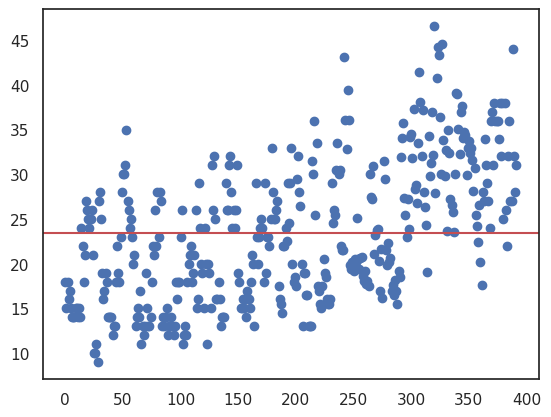

In [179]:
plt.plot(y,'o')
plt.axhline(y.mean(),c='r')

<AxesSubplot:ylabel='Count'>

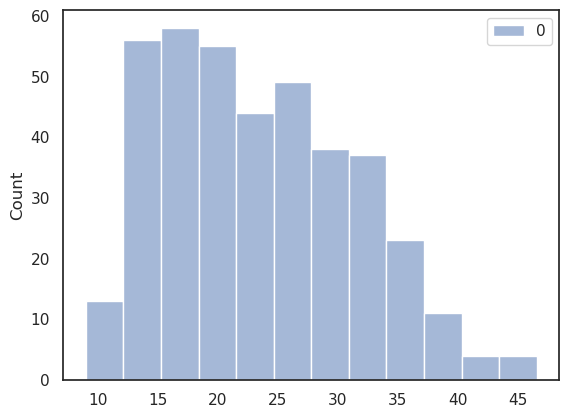

In [187]:
sns.histplot(y)

<AxesSubplot:ylabel='Count'>

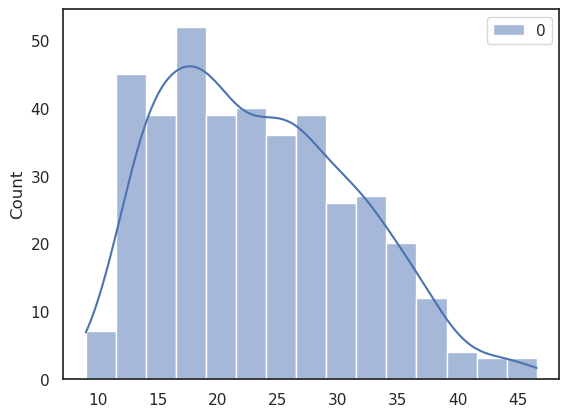

In [188]:
sns.histplot(y, kde=True, bins=15)

<AxesSubplot:ylabel='Count'>

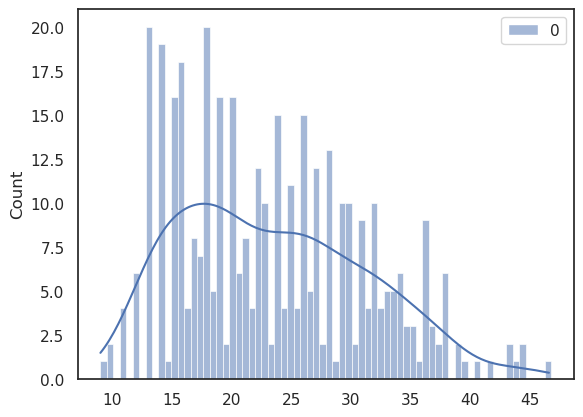

In [189]:
sns.histplot(y, kde=True, binwidth=.54)

<AxesSubplot:ylabel='Count'>

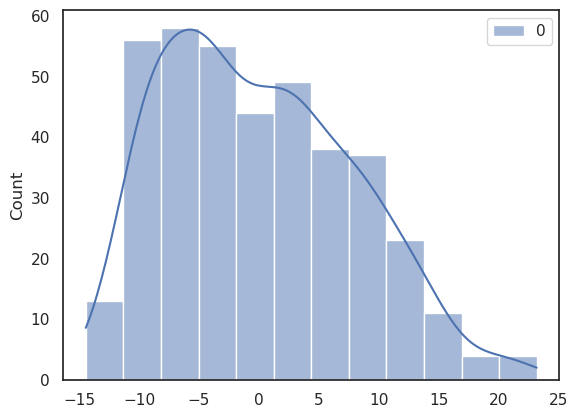

In [191]:
sns.histplot(y-y.mean(), kde=True)

In [195]:
np.random.choice(y)

ValueError: a must be 1-dimensional

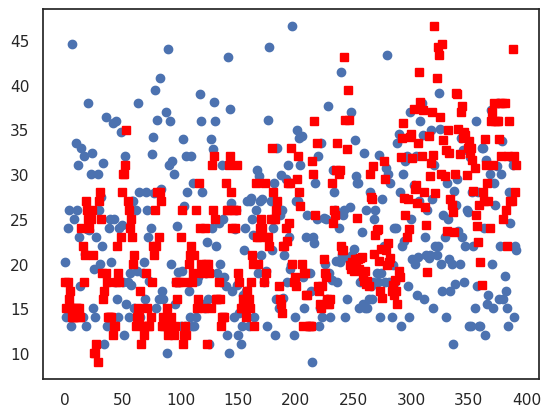

In [215]:
plt.plot(np.random.permutation(y),'o')
plt.plot(y,'s',c='red')

<AxesSubplot:ylabel='Count'>

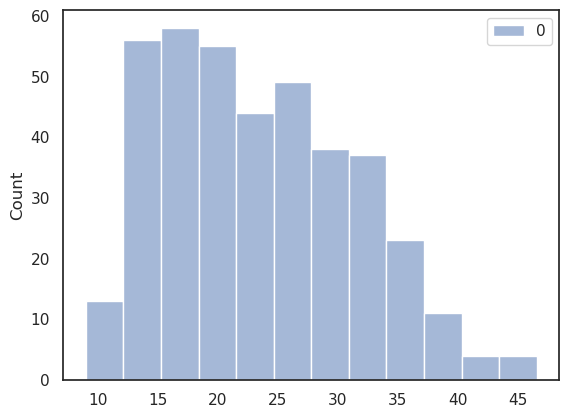

In [216]:
sns.histplot(np.random.permutation(y))

<AxesSubplot:ylabel='Count'>

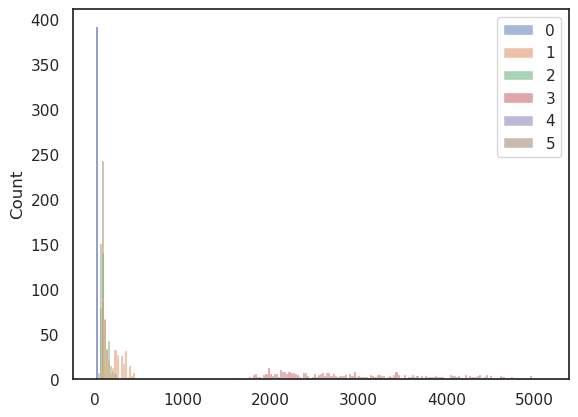

In [218]:
sns.histplot(X)

<AxesSubplot:ylabel='Count'>

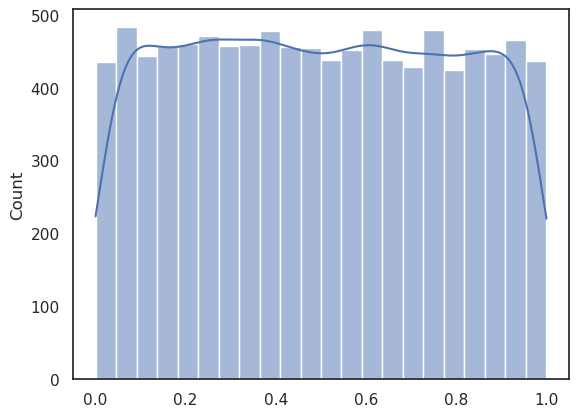

In [235]:
sns.histplot(
    np.random.rand(10000),kde=True
)

In [244]:
n=10^4
sample = np.random.rand(n)
sample.mean()

0.5465155113908386

In [253]:
np.random.rand(4,10)

array([[0.54562243, 0.77668873, 0.85518349, 0.5113196 , 0.09144588,
        0.67646546, 0.53011856, 0.47951173, 0.54209179, 0.49735097],
       [0.0544069 , 0.20043272, 0.55051522, 0.23001004, 0.02452267,
        0.29040183, 0.91708367, 0.69359421, 0.41377149, 0.19983979],
       [0.39666101, 0.1528    , 0.95858234, 0.5774261 , 0.56796147,
        0.12047524, 0.25324915, 0.14926067, 0.58753471, 0.45892089],
       [0.46440881, 0.02596033, 0.17135453, 0.92492422, 0.19204092,
        0.1608108 , 0.96291383, 0.33280803, 0.18988672, 0.80159974]])

In [252]:
np.mean(np.random.rand(4,10),axis=1)

array([0.50403511, 0.42434561, 0.40448346, 0.72512308])

<AxesSubplot:ylabel='Count'>

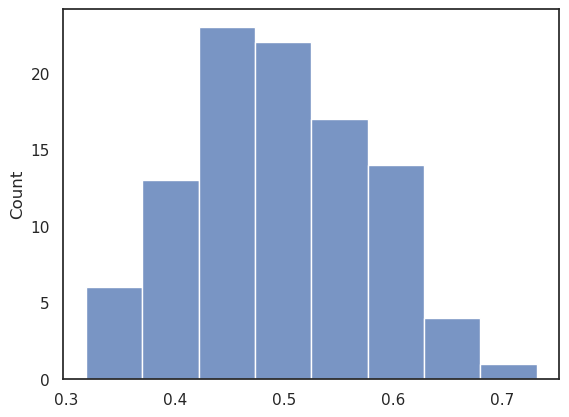

In [257]:
sns.histplot(
    np.mean(np.random.rand(100,n),axis=1)
)

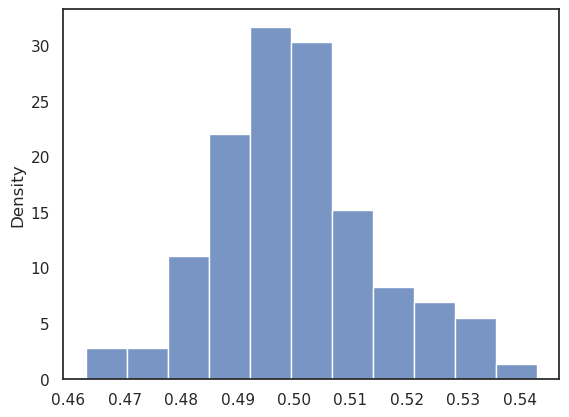

In [300]:
ax = sns.histplot(
    np.mean(np.random.rand(100,392),axis=1), stat='density'
)

In [275]:
from scipy import stats

In [292]:
seq = np.mean(np.random.rand(100000,n),axis=1)
loc = seq.mean()
scale = seq.std()
print(loc,scale)

0.49988337389212667 0.07714534547291368


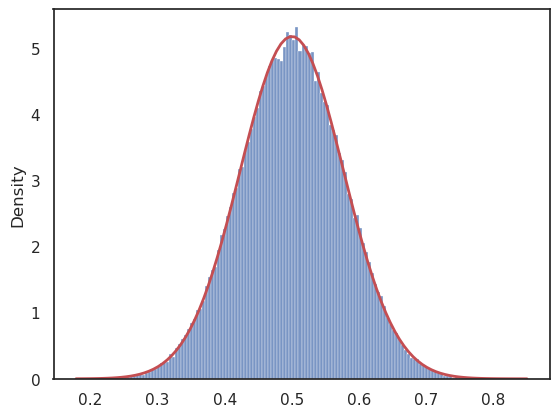

In [293]:
ax = sns.histplot(
    seq, stat='density'
)
x0, x1 = ax.get_xlim()
x_pdf = np.linspace(x0, x1, 100)
y_pdf = stats.norm.pdf(x_pdf, loc=loc, scale=scale)
ax.plot(x_pdf, y_pdf,'r', lw=2)

In [294]:
stats.norm.pdf?

Signature: stats.norm.pdf(x, *args, **kwds)
Docstring:
Probability density function at x of the given RV.

Parameters
----------
x : array_like
    quantiles
arg1, arg2, arg3,... : array_like
    The shape parameter(s) for the distribution (see docstring of the
    instance object for more information)
loc : array_like, optional
    location parameter (default=0)
scale : array_like, optional
    scale parameter (default=1)

Returns
-------
pdf : ndarray
    Probability density function evaluated at x
File:      ~/anaconda3/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py
Type:      method
